In [1]:
import numpy as np

In [2]:
X = np.array([[1, 2], [2, 3], [3, 1], [2, 5], [4, 3]])
Y = np.array([1, 1, 1, 0, 0])

X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def loss(theta):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += - np.log(1 - sigmoid(np.dot(theta, x)))
        else:
            L += - np.log(sigmoid(np.dot(theta, x)))
    return L / len(Y)

In [5]:
def gradient(theta):
    G = 0
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(theta, x)) - y) * x
    return G / len(Y)

In [6]:
def Hess(theta):
    H = 0
    for x in X:
        s = sigmoid(np.dot(theta, x))
        H += s * (1 - s) * np.dot( np.expand_dims(x, axis=1), np.expand_dims(x, axis=0) )
    return H / len(X)

In [7]:
Hess([1, 2, 3])

array([[3.39247952e-05, 5.22589740e-05, 5.89410170e-05],
       [5.22589740e-05, 1.07103931e-04, 7.76277316e-05],
       [5.89410170e-05, 7.76277316e-05, 1.09317110e-04]])

In [8]:
# Phương pháp Newton
initial_theta = np.zeros(X.shape[1])
tolerance = 1e-5
max_iters = 1e4

theta = initial_theta
num_iters = 0
loss_history = [loss(theta)]
while True:
    num_iters += 1
    theta -= np.dot(np.linalg.inv(Hess(theta)), gradient(theta))
    loss_history.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or num_iters == max_iters:
        break

In [9]:
num_iters

10

In [10]:
x_pred = np.array([1, 1, 4])
prob_pred = sigmoid(np.dot(theta, x_pred))
prob_pred

np.float64(0.9999436001128625)

In [11]:
y_pred = 1 if prob_pred >= 0.5 else 0
y_pred

1

In [12]:
a = - theta[1] / theta[2]
b = - theta[0] / theta[2]
a, b

(np.float64(-1.0554380922857354), np.float64(6.073702331005765))

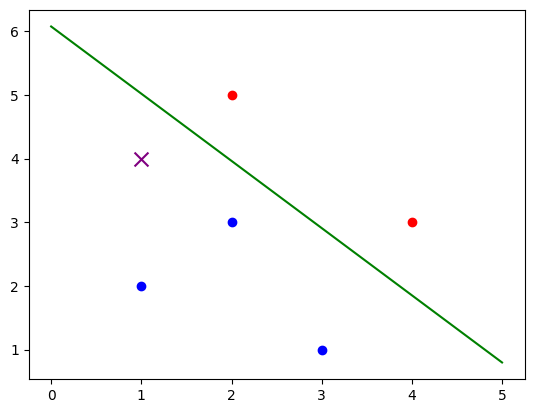

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], color = 'blue')
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], color = 'red')
plt.scatter(x_pred[1], x_pred[2], color = 'purple', marker = 'x', s=100)


X1 = np.linspace(0, 5, 100)
X2 = a*X1 + b
plt.plot(X1, X2, color = 'green')
plt.show()